In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('https://raw.githubusercontent.com/astroclubiitk/computational-astrophysics/main/Week-1/Assignment/Astrosat_Catalog.csv')


In [4]:
#Finding number of HMXB and LMXB
HMXB_count=df.loc[df.Final_Type == 'HMXB', 'Final_Type'].count()
print (HMXB_count)
LMXB_count=df.loc[df.Final_Type== 'LMXB','Final_Type'].count()
print(LMXB_count)

118
121


In [5]:
#locating Granat 1915+105
df.loc[df.SIMBAD_Name=='Granat 1915+105','SIMBAD_Name']

213    Granat 1915+105
Name: SIMBAD_Name, dtype: object

In [6]:
#Granat 1915+105 data
display(df.iloc[213])

ra                        288.821
dec                       10.9683
Source_Name       1915+105       
SIMBAD_Name       Granat 1915+105
Final_Type                   HMXB
Astrosat_Flag                   1
Name: 213, dtype: object

In [7]:
#defining new dataframes
df_1_1=df.where(df['Final_Type']=='HMXB')
df_1_2=df.where(df['Final_Type']=='LMXB')
df_2_1=df.where(df['Astrosat_Flag']==1)
df_2_2=df.where(df['Astrosat_Flag']==0)

#precautionary NaN drop
df_1_1=df.where(df['Final_Type']=='HMXB').dropna()
df_1_2=df.where(df['Final_Type']=='LMXB').dropna()
df_2_1=df.where(df['Astrosat_Flag']==1).dropna()
df_2_2=df.where(df['Astrosat_Flag']==0).dropna()

In [11]:
ra1_1=np.array(df_1_1['ra'].tolist())            #............................HMXB data
dec1_1=np.array(df_1_1['dec'].tolist())
ra1_2=np.array(df_1_2['ra'].tolist())            #............................LMXB data
dec1_2=np.array(df_1_2['dec'].tolist())
ra1_1 = (ra1_1*np.pi)/180
for i in range(len(ra1_1)):
    ra1_1[i]=ra1_1[i]%(2*np.pi)
    if ra1_1[i]<0:
        ra1_1[i]=ra1_1[i]+2*np.pi
    if ra1_1[i]>np.pi:
        ra1_1[i]=ra1_1[i]-2*np.pi
dec1_1=(dec1_1*np.pi)/180                        #.............................degs to radians
for i in range(len(dec1_1)):
    dec1_1[i]=dec1_1[i]%np.pi
    if dec1_1[i]<0:
        dec1_1[i]=dec1_1[i]+np.pi
    if dec1_1[i]>np.pi/2:
        dec1_1[i]=dec1_1[i]-np.pi
        
ra1_2 =ra1_2*np.pi/180
for i in range(len(ra1_2)):
    ra1_2[i]=ra1_2[i]%(2*np.pi)
    if ra1_2[i]<0:
        ra1_2[i]=ra1_2[i]+2*np.pi
    if ra1_2[i]>np.pi:
        ra1_2[i]=ra1_2[i]-2*np.pi
dec1_2=(dec1_2*np.pi)/180                         #.............................degs to radians
for i in range(len(dec1_2)):
    dec1_2[i]=dec1_2[i]%np.pi
    if dec1_2[i]<0:
        dec1_2[i]=dec1_2[i]+np.pi
    if dec1_2[i]>np.pi/2:
        dec1_2[i]=dec1_2[i]-np.pi

In [12]:
ra2_1=np.array(df_2_1['ra'].tolist())      #........................flag1 data
dec2_1=np.array(df_2_1['dec'].tolist())
ra2_2=np.array(df_2_2['ra'].tolist())      #........................flag0 data
dec2_2=np.array(df_2_2['dec'].tolist())

ra2_1 = ra2_1*np.pi/180
for i in range(len(ra2_1)):
    ra2_1[i]=ra2_1[i]%(2*np.pi)
    if ra2_1[i]<0:
        ra2_1[i]=ra2_1[i]+2*np.pi
    if ra2_1[i]>np.pi:
        ra2_1[i]=ra2_1[i]-2*np.pi

dec2_1=dec2_1*np.pi/180                    #........................degs to radians
for i in range(len(dec2_1)):
    dec2_1[i]=dec2_1[i]%np.pi
    if dec2_1[i]<0:
        dec2_1[i]=dec2_1[i]+np.pi
    if dec2_1[i]>np.pi/2:
        dec2_1[i]=dec2_1[i]-np.pi

ra2_2 = ra2_2*np.pi/180
for i in range(len(ra2_2)):
    ra2_2[i]=ra2_2[i]%(2*np.pi)
    if ra2_2[i]<0:
        ra2_2[i]=ra2_2[i]+2*np.pi
    if ra2_2[i]>np.pi:
        ra2_2[i]=ra2_2[i]-2*np.pi

dec2_2=dec2_2*np.pi/180                     #........................degs to radians
for i in range(len(dec2_2)):
    dec2_2[i]=dec2_2[i]%np.pi
    if dec2_2[i]<0:
        dec2_2[i]=dec2_2[i]+np.pi
    if dec2_2[i]>np.pi/2:
        dec2_2[i]=dec2_2[i]-np.pi

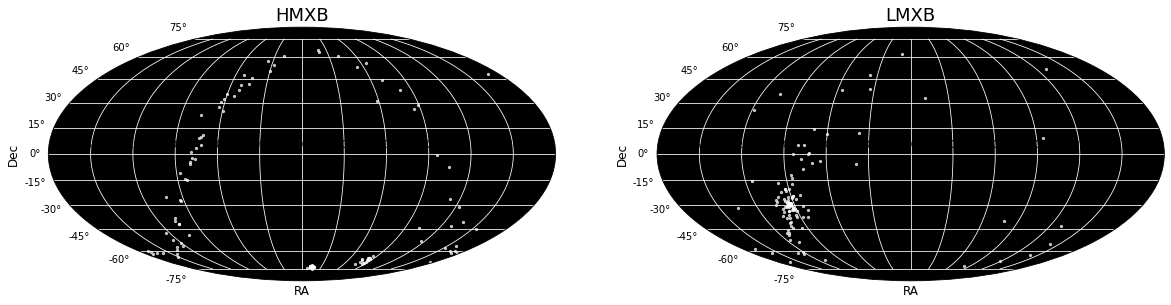

In [13]:
#HXMB and LXMB plots
fig1=plt.figure(figsize=(20,20))
#HXMB
ax1=fig1.add_subplot(121, projection="mollweide",facecolor='black')
ax1.scatter(ra1_1,dec1_1,s=20,c='white',alpha=0.7,marker='.')
ax1.set(title='HMXB')
ax1.grid(c='w')
ax1.title.set_fontsize(18)
ax1.set_xlabel("RA")
ax1.xaxis.label.set_fontsize(12)
ax1.set_ylabel("Dec")
ax1.yaxis.label.set_fontsize(12)

#LMXB
ax2=fig1.add_subplot(122,projection="mollweide",facecolor='black')
ax2.scatter(ra1_2,dec1_2,s=20,c='white',alpha=0.7,marker='.')
ax2.set(title='LMXB')
ax2.grid(c='w')
ax2.title.set_fontsize(18)
ax2.set_xlabel("RA")
ax2.xaxis.label.set_fontsize(12)
ax2.set_ylabel("Dec")
ax2.yaxis.label.set_fontsize(12)



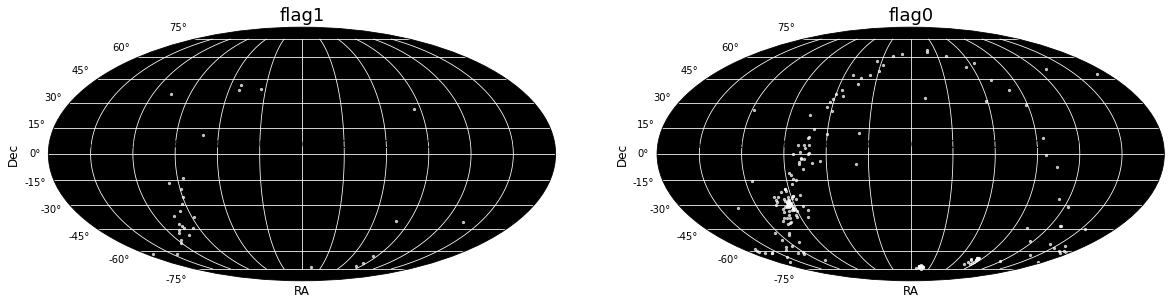

In [15]:
#flag0 and flag1 plots
fig2=plt.figure(figsize=(20,20))
#flag1 
ax3=fig2.add_subplot(121, projection="mollweide",facecolor='black')
ax3.scatter(ra2_1,dec2_1,s=20,c='white',alpha=0.7,marker='.')
ax3.set(title='flag1')
ax3.grid(c='w')
ax3.title.set_fontsize(18)
ax3.set_xlabel("RA")
ax3.xaxis.label.set_fontsize(12)
ax3.set_ylabel("Dec")
ax3.yaxis.label.set_fontsize(12)

#flag0
ax4=fig2.add_subplot(122, projection="mollweide",facecolor='black',alpha=0.001)
ax4.scatter(ra2_2,dec2_2,s=20,c='white',alpha=0.7,marker='.')
ax4.set(title='flag0')
ax4.grid(c='w')
ax4.title.set_fontsize(18)
ax4.set_xlabel("RA")
ax4.xaxis.label.set_fontsize(12)
ax4.set_ylabel("Dec")
ax4.yaxis.label.set_fontsize(12)



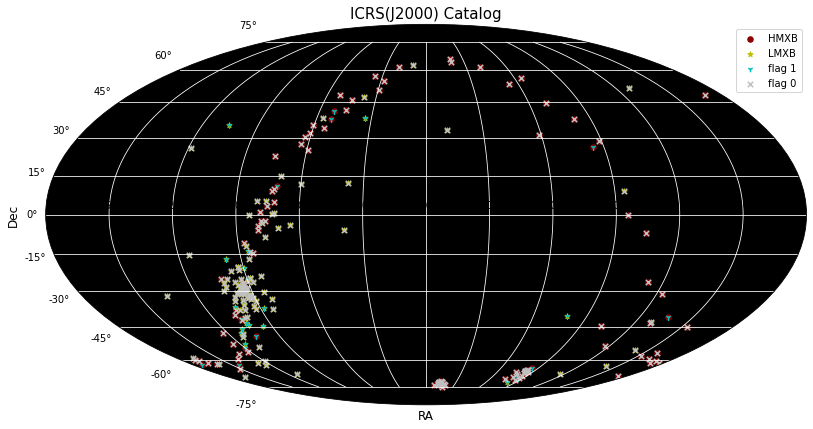

In [17]:
#combined Mollweide Plot
ra_c=[ra1_1,ra1_2,ra2_1,ra2_2]
dec_c=[dec1_1,dec1_2,dec2_1,dec2_2]
m=['o','*','1','x']
colr=['darkred','y','c','silver']
fig3=plt.figure(figsize=(30,30))
ax5=fig3.add_subplot(121, projection="mollweide",facecolor='black')
l=['HMXB','LMXB','flag 1','flag 0']
for i in range(len(ra_c)):
    ax5.scatter(ra_c[i],dec_c[i],marker=m[i],color=colr[i],s=30,label=l[i])
ax5.set(title='ICRS(J2000) Catalog')
ax5.grid(c='w')
ax5.title.set_fontsize(15)
ax5.set_xlabel("RA")
ax5.xaxis.label.set_fontsize(12)
ax5.set_ylabel("Dec")
ax5.yaxis.label.set_fontsize(12)
ax5.legend(loc="upper right")
plt.show()

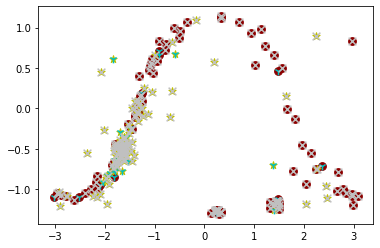

In [18]:
#refrence plot on x-y plane
for i in range(len(ra_c)):
    plt.scatter(ra_c[i],dec_c[i],marker=m[i],color=colr[i],s=60)